# Neuromodulation example

This neuromodulation creates a small network of neurons. We also use the reaction diffusion model by Anu G Nair 2015.

To generate the ```reaction_diffusion.json``` file in ```data/dspn_rxd``` from the xml file we run ```data/convert_sbml_to_json.sh```

To get the RxD functionality of the ```DA_syn``` we must specify the "RxD" block under channel_parameters in the connectivity block of the network configuration. See ```data/connectivity.json```

```
    "channel_parameters":
		"RxD": {
		    "species_name": "DA",
		    "flux_variable": "open",
		    "region": "internal"
		},

     ...
     }
```

In [1]:
import os
from snudda import Snudda

neuron_path = os.path.join("data", "dspn_rxd")
network_path = os.path.join("networks", "neuromodulation_example_anu")
connectivity_path = os.path.join("data", "connectivity.json")

snudda = Snudda(network_path=network_path)
snudda.init_tiny(neuron_paths=neuron_path, neuron_names="neuron_1", number_of_neurons=[2], 
                 connection_config=connectivity_path, random_seed=12345)
snudda.create_network()

Reading connectivity from data/connectivity.json
Adding neurons: neuron_1 from dir data/dspn_rxd
Writing networks/neuromodulation_example_anu/network-config.json
Placing neurons
Network path: networks/neuromodulation_example_anu
Reading SNUDDA_DATA=None from networks/neuromodulation_example_anu/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/neuromodulation_example_anu/network-synapses.hdf5
No n_putative_points and putative_density, setting n_putative_points = 63
(this must be larger than the number of neurons you want to place)
Generating 63 points for networks/neuromodulation_example_anu/mesh/Cube-cube-mesh-2.917951293943981e-05.obj
Filtering, keeping inside points: 4 / 26
neuron_name = 'neuron_1', num = 2, neuron_path = 'data/dspn_rxd'
stop_parallel disabled, to keep pool running.

Execution time: 0.0s
Touch detection
Network path: networks/neuromodulation_example_anu
Reading SNUDDA_DATA=None from networks/neuromodulation_example_an

In [2]:
mech_dir = os.path.join("data", "mechanisms")
sim = snudda.simulate(time=0, mech_dir=mech_dir)

Using input file None
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64, aarch64, arm64 directories (or nrnmech.dll) then you will force a recompilation of the modules.
Reading SNUDDA_DATA=None from networks/neuromodulation_example_anu/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from networks/neuromodulation_example_anu/network-synapses.hdf5
0 : Memory status: 65% free
0 : Memory status: 65% free
Added 0.0 gap junctions to simulation (0 total)
Added 67 synapses to simulation (67 total)
0 : Memory status: 69% free
No input file given, not adding external input!
0 : Memory status: 69% free
0 : Memory status: 69% free
Time set to 0 ms. No simulation run.
Program run time: 318.3s


In [3]:
sim.add_rxd_concentration_recording(species="PKA", neuron_id=0,
                                    region="soma_internal",
                                    sec_type="soma",
                                    sec_id=0,
                                    sec_x=0.5)

In [4]:
sim.run(t=500)

Running simulation for 0.5 s
Running Neuron simulator 500 ms, with dt=0.025
1% done. Elapsed: 2.3 s, estimated time left: 223.1 s
76% done. Elapsed: 103.5 s, estimated time left: 32.7 s
Neuron simulation finished
Simulation run time: 134.8 s


In [5]:
sim.record.write()

Writing network output to networks/neuromodulation_example_anu/simulation/output.hdf5
Using sample dt = None (sample step size None)
Worker 1/1 writing data to networks/neuromodulation_example_anu/simulation/output.hdf5


## Load the data and plot

In [6]:
from snudda.utils import SnuddaLoadNetworkSimulation

output_file = os.path.join(network_path, "simulation", "output.hdf5")
nd = SnuddaLoadNetworkSimulation(output_file)
time = nd.get_time()
data_pka = nd.get_data("PKA", 0)[0][0]

Loading networks/neuromodulation_example_anu/simulation/output.hdf5


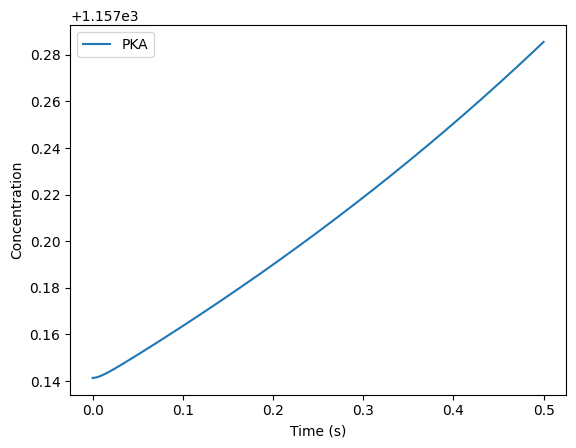

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(time, data_pka, label="PKA")
plt.xlabel("Time (s)")
plt.ylabel("Concentration")
plt.legend()
plt.show()

## TODO!! Also add ability to have external synapses affect RxD concentrations